In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import cv2
from sklearn.cluster import KMeans
import colorsys

YOLO:

class_id,x_center,y_center,width,height

🔎 -2023-02-15-162404_png.rf.372e24f5ca941c1ba189e33f35ab0b1c.jpg


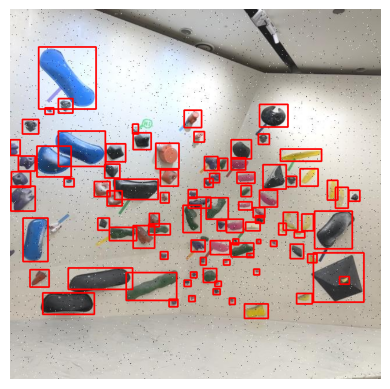

🔎 -2023-02-15-162404_png.rf.4ae301870b57a701ed50fbd4fa52fcdb.jpg


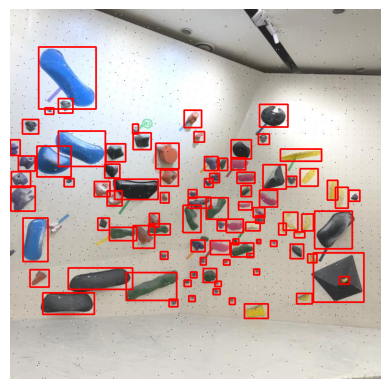

🔎 -2023-02-15-162404_png.rf.5d5d163915a1ed6d82d08715ba8c0f94.jpg


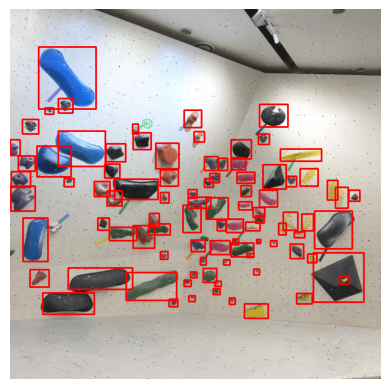

🔎 1-1_jpg.rf.0ae889d27bafb5578b662e52394358db.jpg


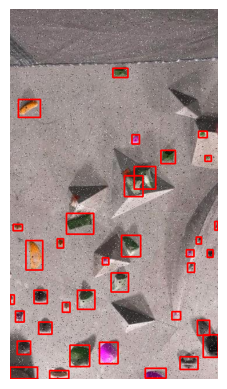

🔎 1-1_jpg.rf.6e9ea06a4f0b9d4eccae3ae503087061.jpg


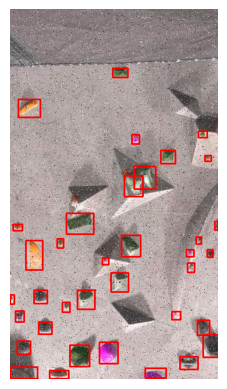

In [ ]:
# Chemins vers dataset
img_dir = r"C:\Users\nico_\Desktop\Climbing project\train\images"
label_dir = r"C:\Users\nico_\Desktop\Climbing project\train\labels"

# Fonction pour afficher une image avec les annotations YOLO
def show_image_with_labels(image_path, label_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) == 5:  # YOLO format classique
                cls, x_center, y_center, width, height = map(float, parts)
                x1 = int((x_center - width / 2) * w)
                y1 = int((y_center - height / 2) * h)
                x2 = int((x_center + width / 2) * w)
                y2 = int((y_center + height / 2) * h)
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Teste de quelques images
images = os.listdir(img_dir)
for img_name in images[:5]:  # 5 premières images
    image_path = os.path.join(img_dir, img_name)
    label_path = os.path.join(label_dir, img_name.replace('.jpg', '.txt'))
    if os.path.exists(label_path):
        print(f" {img_name}")
        show_image_with_labels(image_path, label_path)

# Mesure de la couleur dominante dans une boîte

## Extraction de la zone et prend la couleur moyenne

In [3]:
import numpy as np

def dominant_rgb(crop):
    """
    Retourne la couleur moyenne (R,G,B) d’un patch d’image.
    """
    # on enlève les pixels (0,0,0) éventuels
    pixels = crop.reshape(-1, 3)
    pixels = pixels[~np.all(pixels == 0, axis=1)]
    if len(pixels) == 0:
        return (128, 128, 128)  # gris de secours
    mean = pixels.mean(axis=0)       # [B,G,R] car cv2
    return tuple(int(c) for c in mean[::-1])  # retourne (R,G,B)


## Dessine la boîte dans sa propre couleur

In [4]:
def show_image_with_colored_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    with open(label_path) as f:
        for line in f:
            parts = line.split()
            if len(parts) == 5:
                _, xc, yc, bw, bh = map(float, parts)
                x1 = int((xc - bw / 2) * w)
                y1 = int((yc - bh / 2) * h)
                x2 = int((xc + bw / 2) * w)
                y2 = int((yc + bh / 2) * h)
                crop = img[y1:y2, x1:x2]                      # BGR
                r, g, b = dominant_rgb(crop)                 # RGB
                cv2.rectangle(img_rgb, (x1, y1), (x2, y2),
                              (r, g, b), 2)

    plt.figure(figsize=(8,6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()


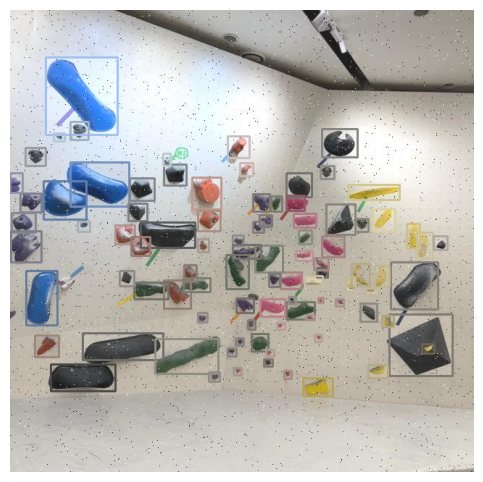

In [5]:
sample = images[0]                                # une des 5 images déjà listées
show_image_with_colored_boxes(
    os.path.join(img_dir, sample),
    os.path.join(label_dir, sample.replace('.jpg', '.txt'))
)


In [6]:
def color_name_extended(r, g, b):
    import colorsys
    h, s, v = colorsys.rgb_to_hsv(r/255, g/255, b/255)
    h *= 360
    s *= 100
    v *= 100

    if v < 20:
        return "black"
    elif v > 90 and s < 15:
        return "white"
    elif s < 25:
        return "grey"
    elif 0 <= h < 20:
        return "red"
    elif 20 <= h < 40:
        return "orange"
    elif 40 <= h < 65:
        return "yellow"
    elif 65 <= h < 170:
        return "green"
    elif 170 <= h < 250:
        return "blue"
    elif 250 <= h < 300:
        return "violet"
    elif 300 <= h < 330:
        return "pink"
    else:
        return "red"

In [ ]:
def show_image_with_colored_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    with open(label_path) as f:
        for line in f:  #  cette ligne doit être indentée ici
            parts = line.strip().split()
            if len(parts) == 5:
                _, xc, yc, bw, bh = map(float, parts)
                x1 = int((xc - bw / 2) * w)
                y1 = int((yc - bh / 2) * h)
                x2 = int((xc + bw / 2) * w)
                y2 = int((yc + bh / 2) * h)

                crop = img[y1:y2, x1:x2]
                r, g, b = dominant_rgb(crop)

                name = color_name_extended(r, g, b)

                cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (r, g, b), 2)
                cv2.putText(img_rgb, name, (x1, y1 - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (r, g, b), 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Boxes colorées + nom de couleur")
    plt.show()


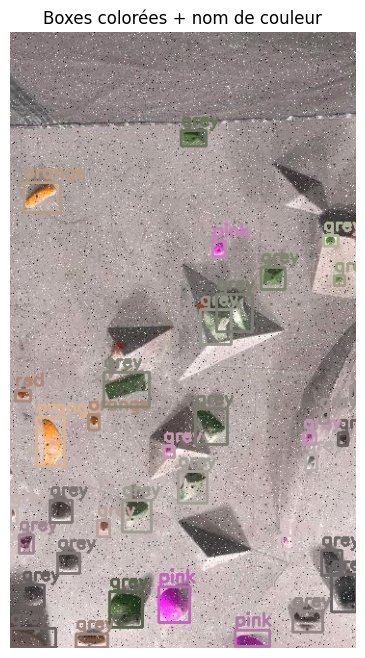

In [8]:
show_image_with_colored_boxes(image_path, label_path)

# Compter les prises de même couleur

In [9]:
from collections import defaultdict

def get_colored_boxes(image_path, label_path):
    img = cv2.imread(image_path)
    h, w = img.shape[:2]
    color_boxes = defaultdict(list)

    with open(label_path) as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 5:
                _, xc, yc, bw, bh = map(float, parts)
                x1 = int((xc - bw / 2) * w)
                y1 = int((yc - bh / 2) * h)
                x2 = int((xc + bw / 2) * w)
                y2 = int((yc + bh / 2) * h)
                crop = img[y1:y2, x1:x2]
                r, g, b = dominant_rgb(crop)
                name = color_name_extended(r, g, b)
                color_boxes[name].append(((x1, y1, x2, y2), (r, g, b)))

    return color_boxes


In [10]:
image_path = os.path.join(img_dir, images[0])
label_path = os.path.join(label_dir, images[0].replace(".jpg", ".txt"))

voies = get_colored_boxes(image_path, label_path)
for couleur, boxes in voies.items():
    print(f"{couleur.upper()} : {len(boxes)} prises")


BLUE : 4 prises
GREY : 73 prises
RED : 6 prises
YELLOW : 8 prises


# Affichage d'une seule voie

In [11]:
def show_single_color_route(image_path, color_name_target):
    label_path = image_path.replace("images", "labels").replace(".jpg", ".txt")
    boxes_by_color = get_colored_boxes(image_path, label_path)

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if color_name_target in boxes_by_color:
        for (x1, y1, x2, y2), color in boxes_by_color[color_name_target]:
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
            cv2.putText(img, color_name_target, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(f"Voie détectée : {color_name_target.upper()}")
    plt.axis('off')
    plt.show()


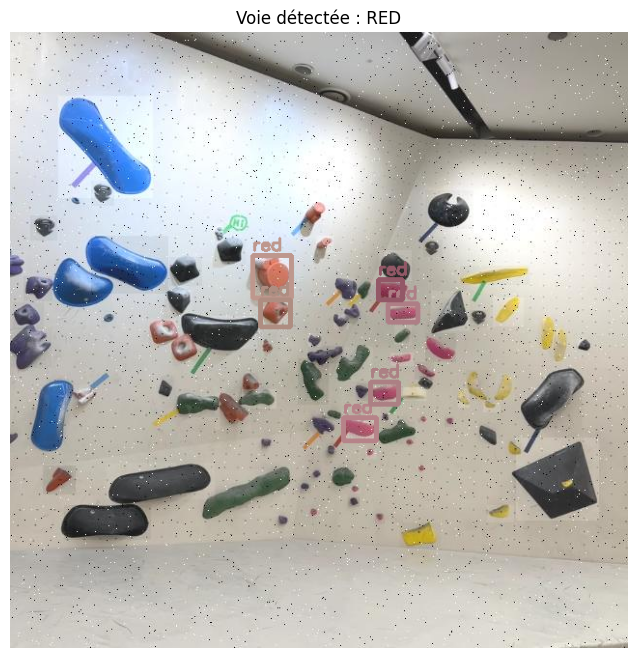

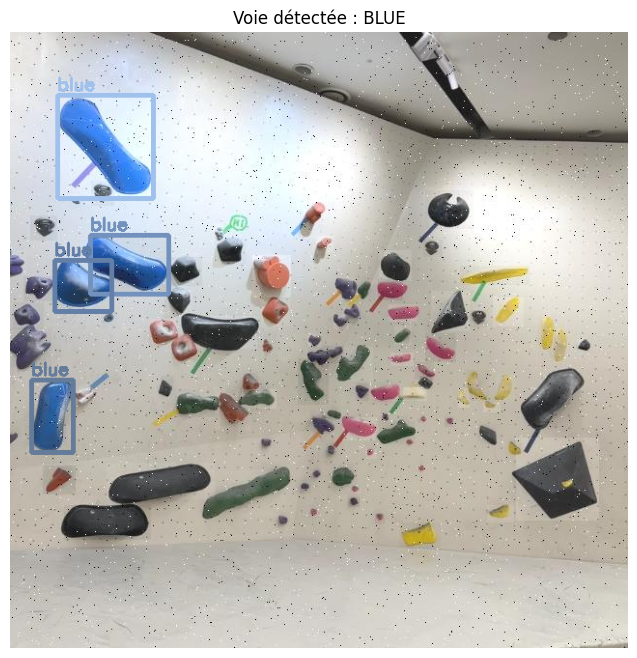

In [12]:
image_path = os.path.join(img_dir, images[0])  # 1ère image du dossier

show_single_color_route(image_path, "red")      # pour la voie rouge
show_single_color_route(image_path, "blue")     # pour la voie bleue


In [23]:
from ultralytics import YOLO

In [24]:
# Chargement de l'architecture
model = YOLO("yolov8n.yaml")

In [25]:
import sys
print(sys.version)

3.10.18 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 13:08:55) [MSC v.1929 64 bit (AMD64)]


In [27]:
import torch
print("CUDA dispo ? ->", torch.cuda.is_available())
print("Nombre de GPU :", torch.cuda.device_count())

CUDA dispo ? -> True
Nombre de GPU : 1


In [28]:
# Entraînement
model.train(data="C:/Users/nico_/Desktop/Climbing project/data.yaml", epochs=30, imgsz=640, device=0)  # device=0 : GPU par défaut

Ultralytics 8.3.159  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:/Users/nico_/Desktop/Climbing project/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

100.0%

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100.0%


AMP: checks passed 
train: Fast image access  (ping: 0.20.1 ms, read: 4.02.0 MB/s, size: 60.9 KB)


train: Scanning C:\Users\nico_\Desktop\Climbing project\train\labels... 2895 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2895/2895 [00:05<00:00, 483.64it/s]


train: New cache created: C:\Users\nico_\Desktop\Climbing project\train\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 4581, len(boxes) = 211020. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.30.2 ms, read: 5.73.3 MB/s, size: 67.3 KB)


val: Scanning C:\Users\nico_\Desktop\Climbing project\valid\labels... 213 images, 0 backgrounds, 0 corrupt: 100%|██████████| 213/213 [00:00<00:00, 235.37it/s]

val: New cache created: C:\Users\nico_\Desktop\Climbing project\valid\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 452, len(boxes) = 10231. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      7.17G       3.75      2.439      3.122       1760        640: 100%|██████████| 181/181 [00:52<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.26it/s]

                   all        213      10231       0.54      0.465      0.437      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.88G      2.348      1.304      1.692       1625        640: 100%|██████████| 181/181 [00:56<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.83it/s]

                   all        213      10231      0.705      0.641      0.648      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.69G       2.02      1.095      1.429       1377        640: 100%|██████████| 181/181 [01:06<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.17it/s]

                   all        213      10231      0.711       0.68      0.665      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.59G      1.877      1.015      1.346       1407        640: 100%|██████████| 181/181 [00:46<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.11it/s]

                   all        213      10231      0.757      0.703      0.723       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      6.77G        1.8     0.9611        1.3       1566        640: 100%|██████████| 181/181 [00:43<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.41it/s]

                   all        213      10231      0.744      0.713      0.728      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.12G      1.751     0.9387      1.278       1948        640: 100%|██████████| 181/181 [00:40<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.52it/s]


                   all        213      10231      0.784      0.743      0.763      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      8.93G      1.709     0.9028      1.251       2190        640: 100%|██████████| 181/181 [00:52<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.12it/s]

                   all        213      10231      0.759      0.734      0.748      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.51G      1.647     0.8683      1.224       1134        640: 100%|██████████| 181/181 [00:36<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        213      10231      0.778      0.753      0.774      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      6.08G      1.637     0.8613      1.215       2037        640: 100%|██████████| 181/181 [00:39<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.82it/s]


                   all        213      10231      0.779      0.764      0.782      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         7G      1.602     0.8489       1.21       1754        640: 100%|██████████| 181/181 [00:42<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        213      10231      0.781      0.769      0.781      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      6.92G      1.578     0.8214      1.184       2227        640: 100%|██████████| 181/181 [00:43<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.59it/s]

                   all        213      10231      0.793      0.764      0.787      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.62G      1.568     0.8091      1.174       1673        640: 100%|██████████| 181/181 [01:00<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.80it/s]

                   all        213      10231      0.795      0.784        0.8      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.54G      1.552     0.8062      1.173       1930        640: 100%|██████████| 181/181 [01:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.86it/s]

                   all        213      10231       0.79      0.771      0.793      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      8.31G      1.531      0.786       1.16       1952        640: 100%|██████████| 181/181 [00:44<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.07it/s]

                   all        213      10231      0.801      0.787      0.805      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.98G      1.515     0.7818      1.158       2099        640: 100%|██████████| 181/181 [00:40<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.26it/s]

                   all        213      10231      0.802      0.788      0.814      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      6.74G      1.506     0.7723      1.149       1298        640: 100%|██████████| 181/181 [00:41<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.20it/s]

                   all        213      10231        0.8      0.782      0.808      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      5.63G      1.493     0.7633      1.145       1415        640: 100%|██████████| 181/181 [00:37<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]


                   all        213      10231      0.802       0.78      0.809      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       9.8G      1.486     0.7566      1.139       1749        640: 100%|██████████| 181/181 [00:54<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  3.99it/s]

                   all        213      10231      0.804      0.788      0.815      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.78G      1.471     0.7531      1.133       1493        640: 100%|██████████| 181/181 [00:39<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.23it/s]

                   all        213      10231      0.801      0.778       0.81      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      7.66G      1.467     0.7452      1.129       1853        640: 100%|██████████| 181/181 [00:42<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.03it/s]

                   all        213      10231      0.814      0.798      0.824      0.425


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.39G      1.441     0.7376      1.144        790        640: 100%|██████████| 181/181 [00:33<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        213      10231       0.79       0.76      0.791      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.41G      1.424     0.7209      1.133        765        640: 100%|██████████| 181/181 [00:32<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.28it/s]

                   all        213      10231      0.826      0.797      0.828      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.44G      1.404     0.7072      1.125        731        640: 100%|██████████| 181/181 [00:31<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.21it/s]

                   all        213      10231      0.816      0.806      0.834      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.95G      1.392     0.6969      1.119       1180        640: 100%|██████████| 181/181 [00:31<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]

                   all        213      10231      0.821      0.797      0.828      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.31G      1.386     0.6926      1.115        880        640: 100%|██████████| 181/181 [00:31<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.13it/s]

                   all        213      10231      0.819      0.801      0.827       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      5.81G      1.374     0.6834      1.113        904        640: 100%|██████████| 181/181 [00:31<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.36it/s]


                   all        213      10231       0.81      0.814      0.833      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.36G      1.371     0.6803      1.106       1297        640: 100%|██████████| 181/181 [00:31<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.43it/s]

                   all        213      10231      0.816      0.815      0.834      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.31G      1.359     0.6716      1.102        954        640: 100%|██████████| 181/181 [00:31<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.57it/s]

                   all        213      10231       0.81      0.803      0.826      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.96G      1.354     0.6689      1.102       1378        640: 100%|██████████| 181/181 [00:30<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]

                   all        213      10231      0.823       0.81      0.836      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.44G      1.346     0.6622      1.096        985        640: 100%|██████████| 181/181 [00:30<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.31it/s]

                   all        213      10231      0.825      0.808      0.835      0.432



30 epochs completed in 0.378 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.159  Python-3.10.18 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]


                   all        213      10231      0.818      0.814      0.834      0.435
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001E381074970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [29]:
# Chargement du modèle entraîné
model = YOLO("runs/detect/train/weights/best.pt") 

In [32]:
test_dir =  r"C:\Users\nico_\Desktop\Climbing project\test\images"

for fname in os.listdir(test_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(test_dir, fname)
        results = model(img_path)

        # Affichage
        results[0].show()


image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\19498548.jpg: 640x480 300 holds, 21.6ms
Speed: 4.0ms preprocess, 21.6ms inference, 9.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Croix_nivert_angle_site-e1617555365400.jpg: 384x640 56 holds, 25.6ms
Speed: 7.5ms preprocess, 25.6ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Cration-voies-escalade-collge-Auneuil.jpg: 640x480 66 holds, 20.4ms
Speed: 10.8ms preprocess, 20.4ms inference, 13.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\IMG_0327-min-1024x683.jpg: 448x640 127 holds, 26.5ms
Speed: 2.4ms preprocess, 26.5ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\le_nautil.jpg: 256x640 115 holds, 21.0ms
Speed: 2.8ms preprocess,

In [60]:
# === CONFIGURATION ===
test_dir = r"C:\Users\nico_\Desktop\Climbing project\test\images"
save_dir = r"C:\Users\nico_\Desktop\Climbing project\test\results"
os.makedirs(save_dir, exist_ok=True)

model = YOLO("runs/detect/train/weights/best.pt")

# === UTILITAIRE : couleur dominante ===
def get_dominant_color(crop):
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    pixels = crop.reshape(-1, 3)
    pixels = pixels[np.all(pixels != [255, 255, 255], axis=1)]
    if len(pixels) == 0:
        return (128, 128, 128)
    return tuple(np.mean(pixels, axis=0).astype(int))

# === TRAITEMENT PAR IMAGE ===
for fname in os.listdir(test_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(test_dir, fname)
        results = model(img_path)
        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        color_counts = defaultdict(int)

        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            crop = img[y1:y2, x1:x2]

            # Couleur moyenne (dominante)
            r, g, b = get_dominant_color(crop)
            color_bgr = (int(b), int(g), int(r))  # pour affichage OpenCV
            label = f"({r},{g},{b})"

            # Compteur (optionnel)
            color_counts[label] += 1

            # Dessin de la boîte
            cv2.rectangle(img, (x1, y1), (x2, y2), color_bgr, 2)

            # Fond pour le label
            (label_w, label_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(img, (x1, y1 - label_h - 6), (x1 + label_w, y1), color_bgr, -1)

            # Texte par-dessus (blanc)
            cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Sauvegarde image annotée
        output_path = os.path.join(save_dir, fname)
        cv2.imwrite(output_path, img)

        # Résumé console
        print(f"\n {fname}")
        for c, count in color_counts.items():
            print(f"  {c} : {count} prises")



image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\19498548.jpg: 640x480 300 holds, 26.6ms
Speed: 9.5ms preprocess, 26.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

 19498548.jpg
  (72,119,149) : 1 prises
  (162,71,67) : 1 prises
  (195,77,103) : 1 prises
  (126,152,123) : 1 prises
  (121,124,131) : 1 prises
  (178,78,71) : 1 prises
  (94,127,155) : 1 prises
  (120,67,45) : 1 prises
  (191,99,123) : 1 prises
  (160,83,74) : 1 prises
  (158,86,78) : 1 prises
  (82,112,140) : 1 prises
  (168,106,76) : 1 prises
  (177,90,107) : 1 prises
  (197,76,61) : 1 prises
  (113,132,151) : 1 prises
  (200,170,80) : 1 prises
  (189,135,104) : 1 prises
  (171,61,58) : 1 prises
  (189,82,115) : 1 prises
  (108,129,147) : 1 prises
  (198,166,82) : 1 prises
  (148,81,84) : 1 prises
  (105,137,161) : 1 prises
  (120,96,106) : 1 prises
  (221,124,151) : 1 prises
  (155,68,65) : 1 prises
  (165,97,70) : 1 prises
  (112,101,83) : 1 prises
  (105,60,49) : 1 prises
  (96,118

In [80]:
from ultralytics import YOLO
import os
import cv2
import numpy as np
from collections import defaultdict
import colorsys

# === CONFIGURATION ===
test_dir = r"C:\Users\nico_\Desktop\Climbing project\test\images"
save_dir = r"C:\Users\nico_\Desktop\Climbing project\test\results_filtered"
os.makedirs(save_dir, exist_ok=True)

model = YOLO("runs/detect/train/weights/best.pt")

# === Liste des couleurs à garder (laisser vide pour tout afficher)
selected_colors = ["red", "blue"]  # ⬅️ Exemple : ["red", "blue"]

# === UTILITAIRE COULEUR ===
def get_dominant_color(crop):
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    pixels = crop.reshape(-1, 3)
    pixels = pixels[np.all(pixels != [255, 255, 255], axis=1)]
    if len(pixels) == 0:
        return (128, 128, 128)
    return tuple(np.mean(pixels, axis=0).astype(int))

def color_name_extended(r, g, b):
    h, s, v = colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)
    h *= 360
    s *= 100
    v *= 100

    if v < 20:
        return "black"
    elif v > 90 and s < 15:
        return "white"
    elif s < 25:
        return "grey"
    elif 0 <= h < 20:
        return "red"
    elif 20 <= h < 40:
        return "orange"
    elif 40 <= h < 65:
        return "yellow"
    elif 65 <= h < 170:
        return "green"
    elif 170 <= h < 250:
        return "blue"
    elif 250 <= h < 300:
        return "violet"
    elif 300 <= h < 330:
        return "pink"
    else:
        return "red"

# === TRAITEMENT PAR IMAGE ===
for fname in os.listdir(test_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(test_dir, fname)
        results = model(img_path)
        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        color_counts = defaultdict(int)

        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            crop = img[y1:y2, x1:x2]

            r, g, b = get_dominant_color(crop)
            name = color_name_extended(r, g, b)

            # Si filtrage actif, on ignore les couleurs non sélectionnées
            if selected_colors and name not in selected_colors:
                continue

            color_bgr = (int(b), int(g), int(r))
            color_counts[name] += 1

            # Boîte
            cv2.rectangle(img, (x1, y1), (x2, y2), color_bgr, 2)

            # Fond texte
            label = name
            (tw, th), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(img, (x1, y1 - th - 6), (x1 + tw, y1), color_bgr, -1)

            # Texte blanc
            cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Sauvegarde
        out_path = os.path.join(save_dir, fname)
        cv2.imwrite(out_path, img)

        # Résumé console
        print(f"\n📸 {fname}")
        for c, count in color_counts.items():
            print(f"    {c}: {count} prises")



image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\19498548.jpg: 640x480 300 holds, 24.8ms
Speed: 7.4ms preprocess, 24.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

📸 19498548.jpg
    blue: 16 prises
    red: 86 prises

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Croix_nivert_angle_site-e1617555365400.jpg: 384x640 56 holds, 29.5ms
Speed: 2.1ms preprocess, 29.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

📸 Croix_nivert_angle_site-e1617555365400.jpg
    blue: 17 prises
    red: 11 prises

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Cration-voies-escalade-collge-Auneuil.jpg: 640x480 66 holds, 30.6ms
Speed: 2.4ms preprocess, 30.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)

📸 Création-voies-escalade-collège-Auneuil.jpg
    blue: 1 prises
    red: 1 prises

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\IMG_0327-min-1024x683.jpg: 448x640 127 holds, 25.6ms
Spe

# Avec KMeans

In [75]:
# === CONFIGURATION ===
test_dir = r"C:\Users\nico_\Desktop\Climbing project\test\images"
save_dir = r"C:\Users\nico_\Desktop\Climbing project\test\results_filtered"
os.makedirs(save_dir, exist_ok=True)

model = YOLO("runs/detect/train/weights/best.pt")

# === Liste des couleurs à garder (laisser vide pour tout afficher)
selected_colors = ["red", "blue"]  # Exemple : ["red", "blue"]

# === UTILITAIRE COULEUR (avec KMeans) ===
def get_dominant_color_kmeans(crop, k=4):            # Faire varier le k pour plus de précision
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    pixels = crop.reshape(-1, 3)
    pixels = pixels[np.all(pixels != [255, 255, 255], axis=1)]
    if len(pixels) < k:
        return tuple(np.mean(pixels, axis=0).astype(int)) if len(pixels) > 0 else (128, 128, 128)
    
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    counts = np.bincount(kmeans.labels_)
    dominant = kmeans.cluster_centers_[np.argmax(counts)]
    return tuple(dominant.astype(int))

def color_name_extended(r, g, b):
    import colorsys
    h, s, v = colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)
    h *= 360
    s *= 100
    v *= 100

    if v < 20:
        return "black"
    elif v > 90 and s < 15:
        return "white"
    elif s < 25:
        return "grey"
    elif (h >= 0 and h < 15) or (h >= 345 and h <= 360):
        return "red"
    elif 15 <= h < 30:
        return "orange"
    elif 30 <= h < 60:
        return "yellow"
    elif 60 <= h < 200:
        return "green"
    elif 200 <= h < 250:
        return "blue"
    elif 250 <= h < 290:
        return "violet"
    elif 290 <= h < 345:
        return "pink"
    else:
        return "red"
    
def get_center_crop(img, x1, y1, x2, y2, scale=0.6):
    cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
    w, h = x2 - x1, y2 - y1
    new_w, new_h = int(w * scale), int(h * scale)
    new_x1 = max(cx - new_w // 2, 0)
    new_y1 = max(cy - new_h // 2, 0)
    new_x2 = min(cx + new_w // 2, img.shape[1])
    new_y2 = min(cy + new_h // 2, img.shape[0])
    return img[new_y1:new_y2, new_x1:new_x2]

# === TRAITEMENT PAR IMAGE ===
for fname in os.listdir(test_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(test_dir, fname)
        results = model(img_path)
        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        color_counts = defaultdict(int)

        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            #crop = img[y1:y2, x1:x2]
            crop = get_center_crop(img, x1, y1, x2, y2, scale=0.4)    # scale à changer si prises sont petites

            #  Couleur dominante via KMeans
            r, g, b = get_dominant_color_kmeans(crop)
            name = color_name_extended(r, g, b)

            #  Si filtrage actif, on ignore les couleurs non sélectionnées
            if selected_colors and name not in selected_colors:
                continue

            color_bgr = (int(b), int(g), int(r))
            color_counts[name] += 1

            # Boîte
            cv2.rectangle(img, (x1, y1), (x2, y2), color_bgr, 2)

            # Fond texte
            label = name
            (tw, th), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(img, (x1, y1 - th - 6), (x1 + tw, y1), color_bgr, -1)

            # Texte blanc
            cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Sauvegarde
        out_path = os.path.join(save_dir, fname)
        cv2.imwrite(out_path, img)

        # Résumé console
        print(f"\n {fname}")
        for c, count in color_counts.items():
            print(f"   {c}: {count} prises")



image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\19498548.jpg: 640x480 300 holds, 24.6ms
Speed: 9.0ms preprocess, 24.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 480)

 19498548.jpg
   blue: 33 prises
   red: 48 prises

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Croix_nivert_angle_site-e1617555365400.jpg: 384x640 56 holds, 14.8ms
Speed: 3.0ms preprocess, 14.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

 Croix_nivert_angle_site-e1617555365400.jpg
   red: 7 prises
   blue: 5 prises

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Cration-voies-escalade-collge-Auneuil.jpg: 640x480 66 holds, 30.9ms
Speed: 2.7ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)

 Création-voies-escalade-collège-Auneuil.jpg
   red: 20 prises
   blue: 2 prises

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\IMG_0327-min-1024x683.jpg: 448x640 127 holds, 18.3ms
Speed: 2.6ms 

c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimato


 mur-escalade-02.jpg
   red: 63 prises
   blue: 19 prises

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\WhatsApp Image 2023-10-27 at 18.14.15.jpeg: 480x640 226 holds, 19.6ms
Speed: 3.8ms preprocess, 19.6ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimato


 WhatsApp Image 2023-10-27 at 18.14.15.jpeg
   red: 54 prises
   blue: 21 prises


# Code final

In [81]:
# === CONFIGURATION ===
test_dir = r"C:\Users\nico_\Desktop\Climbing project\test\images"
model = YOLO("runs/detect/train/weights/best.pt")

# === UTILITAIRES ===
def get_dominant_color_kmeans(crop, k=4):
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
    pixels = crop.reshape(-1, 3)
    pixels = pixels[np.all(pixels != [255, 255, 255], axis=1)]
    if len(pixels) < k:
        return tuple(np.mean(pixels, axis=0).astype(int)) if len(pixels) > 0 else (128, 128, 128)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
    counts = np.bincount(kmeans.labels_)
    dominant = kmeans.cluster_centers_[np.argmax(counts)]
    return tuple(dominant.astype(int))

def color_name_extended(r, g, b):
    h, s, v = colorsys.rgb_to_hsv(r / 255, g / 255, b / 255)
    h *= 360
    s *= 100
    v *= 100
    if v < 20: return "black"
    elif v > 90 and s < 15: return "white"
    elif s < 25: return "grey"
    elif (h >= 0 and h < 15) or (h >= 345 and h <= 360): return "red"
    elif 15 <= h < 30: return "orange"
    elif 30 <= h < 60: return "yellow"
    elif 60 <= h < 200: return "green"
    elif 200 <= h < 250: return "blue"
    elif 250 <= h < 290: return "violet"
    elif 290 <= h < 345: return "pink"
    else: return "red"

def get_center_crop(img, x1, y1, x2, y2, scale=0.4):
    cx, cy = (x1 + x2) // 2, (y1 + y2) // 2
    w, h = x2 - x1, y2 - y1
    new_w, new_h = int(w * scale), int(h * scale)
    new_x1 = max(cx - new_w // 2, 0)
    new_y1 = max(cy - new_h // 2, 0)
    new_x2 = min(cx + new_w // 2, img.shape[1])
    new_y2 = min(cy + new_h // 2, img.shape[0])
    return img[new_y1:new_y2, new_x1:new_x2]

# === ETAPE 1 : TOUT DETECTER ET SAUVEGARDER EN MEMOIRE ===
all_boxes_by_image = {}

for fname in os.listdir(test_dir):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(test_dir, fname)
        img = cv2.imread(img_path)
        results = model(img_path)
        h, w = img.shape[:2]
        boxes = []

        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            crop = get_center_crop(img, x1, y1, x2, y2, scale=0.4)
            r, g, b = get_dominant_color_kmeans(crop)
            name = color_name_extended(r, g, b)
            boxes.append((x1, y1, x2, y2, (int(b), int(g), int(r)), name))  # BGR + label

        all_boxes_by_image[fname] = (img.copy(), boxes)

# === ETAPE 2 : SAUVEGARDE DES VUES FILTRÉES PAR COULEUR ===
output_base = r"C:\Users\nico_\Desktop\Climbing project\test\filtered_views"
os.makedirs(output_base, exist_ok=True)

# Liste de couleurs
all_colors = ["red", "blue", "green", "yellow", "orange", "pink", "violet", "white", "black", "grey"]

for color_filter in all_colors:
    out_dir = os.path.join(output_base, color_filter)
    os.makedirs(out_dir, exist_ok=True)

    for fname, (original_img, boxes) in all_boxes_by_image.items():
        img = original_img.copy()
        count = 0
        for x1, y1, x2, y2, color_bgr, name in boxes:
            if name != color_filter:
                continue
            count += 1
            cv2.rectangle(img, (x1, y1), (x2, y2), color_bgr, 2)
            (tw, th), _ = cv2.getTextSize(name, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(img, (x1, y1 - th - 6), (x1 + tw, y1), color_bgr, -1)
            cv2.putText(img, name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        if count > 0:
            save_path = os.path.join(out_dir, fname)
            cv2.imwrite(save_path, img)
            print(f" {color_filter.upper()} → {save_path}")



image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\19498548.jpg: 640x480 300 holds, 24.4ms
Speed: 2.9ms preprocess, 24.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Croix_nivert_angle_site-e1617555365400.jpg: 384x640 56 holds, 28.0ms
Speed: 2.6ms preprocess, 28.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\Cration-voies-escalade-collge-Auneuil.jpg: 640x480 66 holds, 30.9ms
Speed: 2.8ms preprocess, 30.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\IMG_0327-min-1024x683.jpg: 448x640 127 holds, 19.2ms
Speed: 2.7ms preprocess, 19.2ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\nico_\Desktop\Climbing project\test\images\le_nautil.jpg: 256x640 115 holds, 15.2ms
Speed: 5.2ms preprocess, 1

c:\Users\nico_\anaconda3\envs\yolov8-gpu\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


 RED → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\red\19498548.jpg
 RED → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\red\Croix_nivert_angle_site-e1617555365400.jpg
 RED → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\red\Création-voies-escalade-collège-Auneuil.jpg
 RED → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\red\IMG_0327-min-1024x683.jpg
 RED → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\red\le_nautil.jpg
 RED → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\red\mur-escalade-02.jpg
 RED → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\red\WhatsApp Image 2023-10-27 at 18.14.15.jpeg
 BLUE → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\blue\19498548.jpg
 BLUE → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\blue\Croix_nivert_angle_site-e1617555365400.jpg
 BLUE → C:\Users\nico_\Desktop\Climbing project\test\filtered_views\blue\Création-voies-escalade-c